In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [2]:
df1 = pd.read_csv('/datasets/hypothesis.csv')
df1.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<font color=#008000> 1.1 Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. </font>

ICE - Impact, Confidence, Efforts. Для приоритизации гипотез этим способом нам нужно умножить Параметр Impact на Confidence, и поделить получившееся значение на Efforts.

Создадим копию таблицы df1 для работы, и назовём её hypothesis.

In [3]:
hypothesis = df1.copy()

Добавим в hypothesis колонку ICE.

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

Отсортируем её и выведем на экран.

In [5]:
hypothesis[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Самая перспективная гипотеза № 9, т.к. у неё высокие значения impact и confidence, и достаточно низкое значение effortsю За ней следуют № 1 и № 8.

<font color=#008000> 1.2 Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. </font>

RICE - Reach, Impact, Confidence, Efforts. Вычисляется он почти также как фреймвор ICE, только топерь в формулу добавляется значение Reach.

Параметр Reach показывает количество пользователей, которое затронет вводимое изменение. Если он равен 1, то он затронет минимальное количество пользователей, а если 10 - максимальное.

Добавим в таблицу hypothesis колонку RICE.

In [6]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

Снова отсортируем её, но уже по колонке RICE.

In [7]:
hypothesis[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Результаты изменились: самые преспективные гипотезы № 7, 3, 1. Гипотеза № 9 уехала на 5е место. Это произошло, потому что гипотезы № 8 параметр Reach павен 10, тоесть внесение этого изменения затронет наибольшеее количество пользователей. В свою очередь у гипотезы № 8 Reach равен 1, и внесение этого изменения затронет наименьшее количество пользователей.


## Часть 2. Анализ A/B-теста.

Нам предоставлены 2 файла: /datasets/orders.csv и /datasets/visitors.csv.

Прочтём их.

In [8]:
df2 = pd.read_csv('/datasets/orders.csv')
orders = df2.copy()
orders.columns = ['orderId', 'userId', 'date', 'revenue', 'group']
orders.head(5)

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
df3 = pd.read_csv('/datasets/visitors.csv')
visitors = df3.copy()
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Переведём колонки date в этих таблицах в datetime.

In [10]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Создадим таблицу datesGroups с массивом уникальных пар дат и групп из таблицы orders.

In [11]:
datesGroups = orders[['date','group']].drop_duplicates()

Создадим переменную ordersAggregated, содержащую:

- дату
- группу A/B-теста
- число уникальных заказов в группе теста по указанную дату включительно
- число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно
- суммарную выручку заказов в группе теста по указанную дату включительно

In [12]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'orderId' : pd.Series.nunique,
    'userId' : pd.Series.nunique,
    'revenue' : 'sum'}), axis=1).sort_values(by = ['date','group'])

Создадим переменную visitorsAggregated, содержащую:

- дату
- группу A/B-теста
- количество уникальных посетителей в группе теста по указанную дату включительно

In [13]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'visitors' : 'sum'}), axis=1).sort_values(by = ['date','group'])

Создадим переменную cummulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date' и 'group'.

In [14]:
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
cummulativeData.head()

,date,group,orderId,userId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Переименуем колонки таблицы cummulativeData.

In [15]:
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<font color=#008000> 2.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения. </font>

Создадим переменные cummulativeRevenueA и cummulativeRevenueB, в которых сохраните данные о датах, выручке и числе заказов в группах A и B.

In [16]:
cummulativeRevenueA = cummulativeData[cummulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

Теперь построим график кумулятивной выручки по группам.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


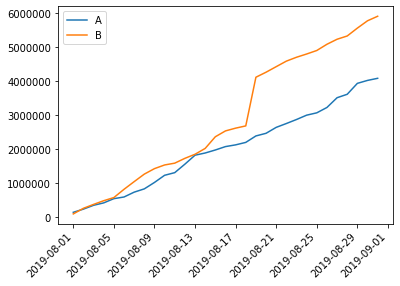

In [17]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label = 'A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label = 'B')
plt.xticks(
    rotation = 45,
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 'medium'
)
plt.legend()

В начале теста группы A и B шли нос к носу, но в середине группа B резко вырвалась вперёд. Возможно наличие аномальных заказов.

<font color=#008000> 2.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения. </font>

Построим график кумулятивного среднего чека по группам, разделив выручку на количество заказов.

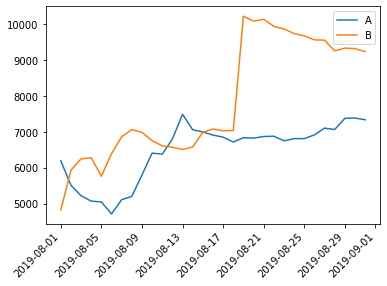

In [18]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'] / cummulativeRevenueA['orders'], label = 'A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'] / cummulativeRevenueB['orders'], label = 'B')
plt.xticks(
    rotation = 45,
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 'medium'
)
plt.legend()

Колебания слишком большие. Необходим анализ выбросов.


<font color=#008000> 2.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения. </font>

Для начала нам нужно создать переменную mergedcummulativeRevenue, содержащую информацию по датам, выручке групп A и B, заказам групп A и B.

In [19]:
mergedcummulativeRevenue = cummulativeRevenueA.merge(
    cummulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])
mergedcummulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Построим рафик.

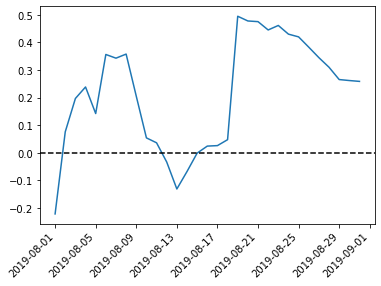

In [20]:
plt.plot(mergedcummulativeRevenue['date'], (mergedcummulativeRevenue['revenueB'] / mergedcummulativeRevenue['ordersB']) /
        (mergedcummulativeRevenue['revenueA'] / mergedcummulativeRevenue['ordersA']) - 1)
plt.xticks(
    rotation = 45,
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 'medium'
)
plt.axhline(y = 0, color = 'black', linestyle = '--')

В разные даты различие между сегментами резко меняется. Возможно наличие аномальных заказов.


<font color=#008000> 2.4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.. </font>

Добавим в таблицу cummulativeData колонку conversion, разделив количество заказов на количество посетителей.

In [21]:
cummulativeData['conversion'] = cummulativeData['orders'] / cummulativeData['visitors']
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


In [22]:
cummulativeDataA = cummulativeData[cummulativeData['group'] == 'A']
cummulativeDataB = cummulativeData[cummulativeData['group'] == 'B']

Построим график кумулятивной конверсии по группам.

['2019-08-01', '2019-09-01', 0.02, 0.05]

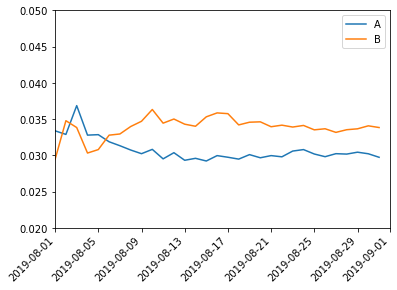

In [23]:
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label = 'A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label = 'B')
plt.xticks(
    rotation = 45,
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 'medium'
)
plt.legend()
plt.axis(["2019-08-01", '2019-09-01', 0.02, 0.05])

В самом начале теста конверсия группы A была выше, но затем группа B выбилась вперёд и оставалась лидером до конца теста. К концу теста у группы B конверсия - 3.5 %, а у группы A - 3 %.


<font color=#008000> 2.5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения. </font>

Для начала объединим таблицы cummulativeDataA и cummulativeDataB, что бы получившаяся таблица содержала колонки date, conversionA, conversionB. Назовём её mergedCummulativeConversions.

In [24]:
mergedCummulativeConversions = cummulativeDataA[['date', 'conversion']].merge(cummulativeDataB[['date', 'conversion']],
                                                                              left_on = 'date', right_on = 'date',
                                                                              how = 'left', suffixes = ['A', 'B'])
mergedCummulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Построим график относительного изменения кумулятивной конверсии группы B к группе A.

['2019-08-01', '2019-09-01', -0.3, 0.3]

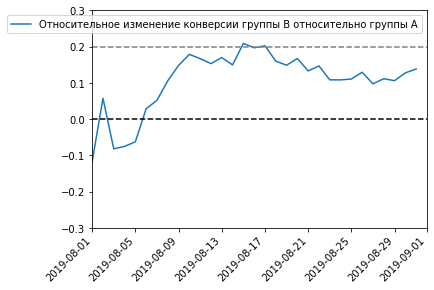

In [25]:
plt.plot(mergedCummulativeConversions['date'],
         mergedCummulativeConversions['conversionB'] / mergedCummulativeConversions['conversionA'] - 1,
         label = "Относительное изменение конверсии группы B относительно группы A")
plt.xticks(
    rotation = 45,
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 'medium'
)
plt.legend()
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axhline(y = 0.2, color = 'grey', linestyle = '--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.3])

Почти с самого начала конверсия группы B была выше, достигнув в середине теста прироста в 20% по отношению к конверсии группы A. Но к концу теста прирост снизился, и зафиксировался в районе 15% по отношению к группе A.


<font color=#008000> 2.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения. </font>

Создадим таблицу ordersByUsers, содержащую колонки visitorId и transactionId.

In [26]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis = 1).groupby('userId', as_index = False).agg({'orderId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']
ordersByUsers.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


Построим точечный график методом scatter().

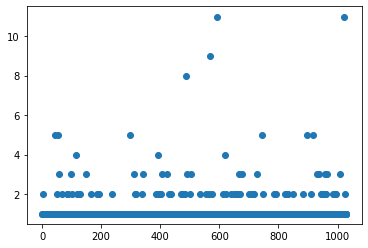

In [27]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values_orders = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values_orders, ordersByUsers['orders'])

Большинство покупателей сделали 1-2 заказа. Остальные значения можно считать аномальными.

<font color=#008000> 2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей. </font>

Для подсчёта перцентилей используется метод percentile().

In [28]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% покупателей совершили больше 2-х заказов. Не более 1% покупателей совершили больше 4-х заказов. Примем за нижнюю границу 2 заказа.

<font color=#008000> 2.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения. </font>

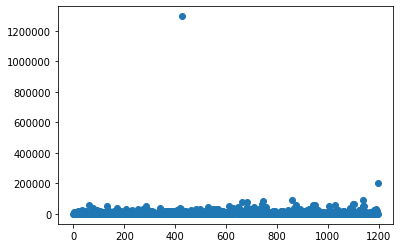

In [29]:
x_values_revenue = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values_revenue, orders['revenue'])

Очень сложно сделать точный вывод из этого графика, но большая часть заказов имела стоимость меньше 200000.


<font color=#008000> 2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов. </font>

In [30]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов имели стоимость выше 28000. Не более 1% заказов имели стоимость выше 58233.2. Примем за нижнюю границу 58000.


<font color=#008000> 2.10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения. </font>

Создадим переменные visitorsADaily и visitorsBDaily, содержащие данные по количеству ежедневных пользователей группы A и B соответственно.

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Создадим переменные visitorsACummulative и visitorsBCummulative, содержащие кумулятивные данные по количеству ежедневных пользователей группы A и B соответственно.

In [32]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis = 1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis = 1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Создадим переменные ordersADaily и ordersBDaily, содержащие данные по количеству ежедневных заказов групп A и B соответственно.

In [33]:
ordersADaily = orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']] \
    .groupby('date', as_index = False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']] \
    .groupby('date', as_index = False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

Создадим переменные ordersACummulative и ordersBCummulative, содержащие кумулятивные данные по количеству ежедневных заказов групп A и B соответственно.

In [34]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединим все вышеперечисленные таблицы.

In [35]:
massive_Cummulative_data = ordersADaily.merge(ordersBDaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(ordersACummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(ordersBCummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsADaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsBDaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsACummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsBCummulative, left_on = 'date', right_on = 'date', how = 'left')
massive_Cummulative_data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами userId, orders. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [36]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('userId', as_index = False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('userId', as_index = False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Создадим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [37]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(massive_Cummulative_data['visitorsPerDateA'].sum() -
                    len(ordersByUsersA['orders'])), name = 'orders')], axis = 0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(massive_Cummulative_data['visitorsPerDateB'].sum() -
                    len(ordersByUsersB['orders'])), name = 'orders')], axis = 0)

Теперь вычислим p-value и относительное различие в конверсии между группами A и B.

In [47]:
print('p-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие в конверсии между группами A и B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.00840
Относительное различие в конверсии между группами A и B: 0.138


p-value значительно меньше 0.05. Анализ "сырых" данных подтверждает наличие статистически значимых различий между конверсиями групп A и B.

Относительное различие в конверсии между группами A и B - 13.8%


<font color=#008000> 2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения. </font>

In [39]:
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],
                                                      orders[orders['group'] == 'B']['revenue'])[1]))

print('Относительные различия в среднем чеке между группами A и B:', "{0:.3f}".format(orders[orders['group'] == 'B']['revenue']
                                                                                    .mean() / orders[orders['group'] == 'A']['revenue']
                                                                                    .mean() - 1))

p-value: 0.365
Относительные различия в среднем чеке между группами A и B: 0.259


p-value значительно больше 0.05. Анализ "сырых" данных отвергает наличие статистическую значимость различий в среднем чеке заказа групп A и B.

Относительное различие среднего чека между группами A и B - 25.9%


<font color=#008000> 2.12 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения. </font>

Мы уже знаем, что аномальное количество заказов - больше 2-х. А аномальная стоимость заказа - больше 58000.

Создадим срез пользователей с аномальным количеством заказов, и назовём его usersWithManyOrders.

In [40]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)

Создадим срез пользователей с аномально дорогими заказами, и назовём его usersWithExpensiveOrders.

In [41]:
usersWithExpensiveOrders = orders[orders['revenue'] > 58000]['userId']

Объединим эти срезы в таблицу abnormalUsers.

In [42]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [43]:
print(abnormalUsers.shape)

(31,)


31 аномальный пользователь. Узнаем, как их действия повлияли на результаты теста.

Подготовим выборки sampleAFiltered и sampleBFiltered с количествами заказов по пользователям по группам теста без аномалий.

In [44]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index = np.arange(massive_Cummulative_data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name = 'orders')], axis = 0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index = np.arange(massive_Cummulative_data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name = 'orders')], axis = 0)

Теперь вычислим p-value и относительное различие в конверсии между группами A и B по "очищенным" данным.

In [45]:
print('p-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('Относительное различие в конверсии между группами A и B:', "{0:.3f}".format(sampleBFiltered.mean() /
                                                                                   sampleAFiltered.mean() - 1))

p-value: 0.00504
Относительное различие в конверсии между группами A и B: 0.174


p-value значительно меньше 0.05. Анализ "очищенных" данных подтверждает наличие статистически значимых различий между конверсиями групп A и B.

Относительное различие в конверсии между группами A и B по очищенным данным - 17.3%


<font color=#008000> 2.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения. </font>

In [46]:
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Относительные различия в среднем чеке между группами A и B:', "{0:.3f}".format(
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean() / 
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value: 0.399
Относительные различия в среднем чеке между группами A и B: -0.020


p-value значительно больше 0.05. Анализ "чистых" данных отвергает наличие статистическую значимость различий в среднем чеке заказа групп A и B.

Относительное различие среднего чека между группами A и B - 2%


<font color=#008000> 2.14 Примите решение по результатам теста и объясните его. </font>

Тест завершён. Конверсия группы B статистически выше конверсии группы A. Статистической разницы между средними чеками нет.